### Mohammed Shahriar Arefin (915811449)
#### Date: 10/24/2021


### Project 1 Part 1

Use Markov Chain Monte Carlo to estimate the distribution of likely values for $\mu$ for arrivals in a Poisson distribution. You are given 50 samples drawn from a Poisson distribution whose value of $\mu$ is unknown to you. Use MCMC to create a histogram of possible values for $\mu$. Recall from Week 4 that the steps in an MCMC simulation are as follows:

1. Pick a value for $\mu$ at random <br><br>
1. Create a *proposal* value by adding a small bit of noise onto $\mu$<br><br>
1. Compute the likelihood that the observed data was generated using $\mu$<br><br>
1. Compute the likelihood that the observed data was generated using $\mu_{proposal}$<br><br>
1. If $\mu_{proposal}$ has a greater likelihood, keep it as the new value of $\mu$<br><br>
1. If $\mu_{proposal}$ has a lower likelihood, keep it as the new value of $\mu$ with probability $\mu_{proposal} \div \mu$<br><br>
1. Repeat steps 2-6 many times<br><br>
1. The histogram of resulting $\mu$ values shows the distribution of likely values of $\mu$ (when histogramming, be sure to ignore the first 10% or so of the values of $\mu$ because they are biased by your initial condition)<br><br>

What does MCMC predict for the average value of $\mu$? How does that compare with the average of 50 samples you are given?

Hint: The overall likelihood is given by the *product* of the likelihoods of each of the 50 observations. However some of these probabilities can be quite small and so their products can vanish to zero, ruining our fun. A good alternative is to compute the *log-likelihoods* and then *add* them. The `scipy.stats.poisson` toolbox has functions for both `pmf` and `logpmf` to facilitate this for you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [2]:
# load the data from file
with open("data_1.npy","rb") as f:
    data = np.load(f)

print(data.shape)

(50,)


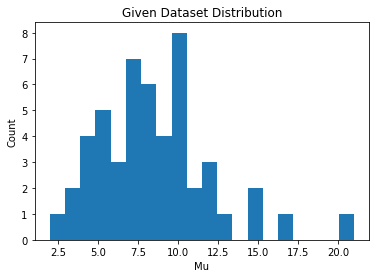

 Mean of Given Dataset: 8.380


In [21]:
# your code goes here

# First Investigate the given dataset

plt.hist(data,20)
plt.title('Given Dataset Distribution')
plt.xlabel('Mu')
plt.ylabel('Count')
plt.show()

print(f" Mean of Given Dataset: {np.mean(data):0.3f}")


# comment everything!

The mean of the given dataset is around 8.38. So, if we implement a MCMC algorithm the mean from that algorithm should also converge around 8.38.

In [22]:
# pick a starting value for the simulation
mu_initial =   np.random.choice([min(data),max(data)],1)       # Select initial mean within the range of whole dataset
print(f" Intial Mean: {mu_initial}")

# set up number of trials
nTrials = int(3e4)


# initialize variables to store likelihood and mean values 

mu_value    = np.zeros(nTrials,)    # Store all mu's
mu_value[0] = mu_initial
likelihood_with_new_mu=[]
likelihood_with_old_mu=[]

 Intial Mean: [2]


In [23]:
# iterate the simulation nTrials times

for i in range(1,nTrials):
   
    mu_noise = stats.norm(scale=1).rvs()   # Generate randomness to add as a noise with the current mean



    # Get old and current (Proposed) mean
    
    mu_old = mu_value[i-1]
    mu_proposed = mu_old + mu_noise

    # compute the log-likehood of each mean with the dataset
    # Logpmf was taken because the product of pmf might be a really smaller number
    # As we are taking the logpmf, we can add all of the likelihoods
    
    likelihood_with_old_mu=((stats.poisson(mu_old).logpmf(data)).sum())      # likelihood with old mu
    likelihood_with_new_mu=((stats.poisson(mu_proposed).logpmf(data)).sum()) # likelihood with new mu
     

    np.seterr(divide='ignore', invalid='ignore')                        # Ignore warnings for invalid division
    
    if  (likelihood_with_new_mu)-(likelihood_with_old_mu) > np.log(stats.uniform.rvs()):   
                                                                 # Compare which mu has higher likelihood 
        mu_value[i]=mu_proposed                                  # If condition is met, store proposed mu
    
    else: 
        mu_value[i]=mu_old                                       # Otherwise, store old mu

        

In case of log-likelihood, instead of dividing two probabilites, we are taking difference between two likelihoods. Then, we compared it with the log of uniform random variable. If the difference was larger, then the mu was updated. Otherwise, mu remained same with probability (mu_prop/mu)

In [24]:
# First reject first 10% of the simulated values as they might be biased towards the assumption

first_10percent= 0.1*nTrials            # First 10% indexes
mu_value_filtered=mu_value[int(first_10percent):]

In [25]:
# First find out what is the mean of filtered mean after running the MCMC simulations

print(f" Mean of from the simulation: {np.mean(mu_value_filtered):0.3f}")



 Mean of from the simulation: 8.399


####Results: 
The mean from the MCMC simulation is 8.399, which is closer to the original datasetmean of 8.38. So, we can say that the MCMC converges to the original mean.

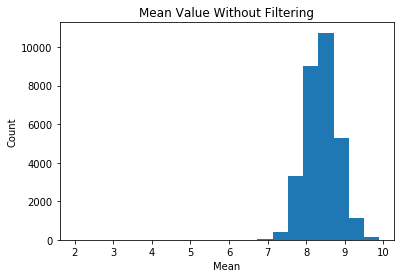

In [28]:
# Now plot the mean values with histogram without filtering

plt.hist(mu_value,20)
plt.title('Mean Value Without Filtering')
plt.xlabel('Mean')
plt.ylabel('Count')
plt.show()

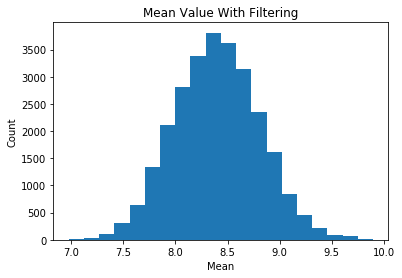

In [29]:
# Now plot the mean values with histogram with filtering

plt.hist(mu_value_filtered,20)
plt.title('Mean Value With Filtering')
plt.xlabel('Mean')
plt.ylabel('Count')
plt.show()

####  Conclusion:
It is evident that the mean converges towards the original dataset mean. As we are filtering out the first 10% of the simulations, the histogram with filtering looks like most the means are clustered around a single value. But it actually moves from the initial assumprtion to the predicted mean gradually (Actual:8.38, MCMC:8.399). Finally, we get a distribution of mean centered around a value or mean proposed mean(8.399). 

Overall, we successfully developed a MCMC simulation to predict the mean of a given poisson distribution.